In [ ]:

import matplotlib.pyplot as plt 
import cv2 
import numpy as np 
from PIL import Image
# Read the image 
img = cv2.imread("./images/Lenna_(test_image).png")


# Histogram Distribution Curve

In [ ]:
# FUnction to compute gray level histogram 
def histogram_Compute(image):
    img_height = image.shape[0]
    img_width = image.shape[1]
    hist = np.zeros([256],np.int32)
    for x in range(0,img_height):
        for y in range(0,img_width):
            hist[image[x,y]] +=1
    np.savetxt("./saved_text/gray scale histogram.txt",hist)
    return hist

'success'

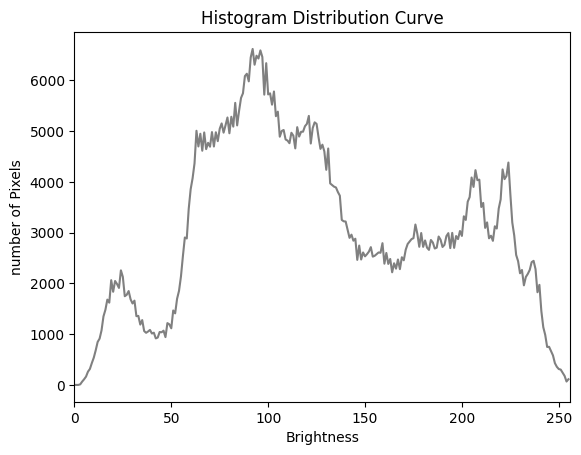

In [30]:
# plotting the gray scale histogram 
def Gray_histogram_Plot(histogram):
    plt.figure()
    plt.title("Histogram Distribution Curve")
    plt.xlabel("Brightness")
    plt.ylabel("number of Pixels")
    plt.xlim([0,256]) # As gray scale levels vary from 0 -> 256
    plt.plot(histogram,'gray')
    plt.savefig("./saved_imgs/Gray_hisogram.jpg")
    return "success"
Gray_Scaled_histogram = histogram_Compute(img)
Gray_histogram_Plot(Gray_Scaled_histogram)

In [ ]:
# histogram for RGB 
def RGB_histogram(image):
    image_Height = image.shape[0]
    image_Width = image.shape[1]
    image_Channels = image.shape[2]
    histogram = np.zeros([256, image_Channels], np.int32)
    for x in range(0, image_Height):
	    for y in range(0, image_Width):
		    for c in range(0, image_Channels):
				    histogram[image[x,y,c], c] +=1
    return histogram

RGB_histogram(img)

'success'

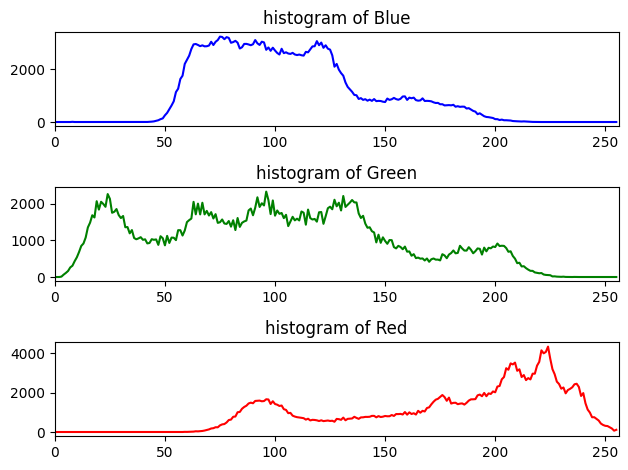

In [31]:
def Plot_RGBHistogram(RGB_Histogram):
    # Separate Histograms for each color
    plt.subplot(3, 1, 1)
    plt.xlim([0, 256])
    plt.title("histogram of Blue")
    plt.plot(RGB_Histogram[:,0],'b')
    
    plt.subplot(3, 1, 2)
    plt.xlim([0, 256])
    plt.title("histogram of Green")
    plt.plot(RGB_Histogram[:,1],'g')
    
    plt.subplot(3, 1, 3)
    plt.xlim([0, 256])
    plt.title("histogram of Red")
	
    plt.plot(RGB_Histogram[:,2],'r')
    # for clear view
    plt.tight_layout()
    plt.savefig("./saved_imgs/RGB_histogram.jpg")
RGB_Histogram = RGB_histogram(img)
Plot_RGBHistogram(RGB_Histogram)

# Image Normalization

In [ ]:
# function to normalize the image
def img_normalization(img):
    Min = np.min(img)
    Max = np.max(img)
    return (((img- Min)/((Max-Min)))) #stretching histogram equation from 0->255 to 0.0 -> 1.0

In [ ]:
norm = img_normalization(img) #applying normalization
# visualize the normalized image
cv2.imshow('Normalized Image', norm) 
cv2.waitKey(0)
cv2.destroyAllWindows()
#showing outputs
print("Image data Before Normalize:\n",img )
print("Maximum img intensity:",img.max() ,"Minimum img intensity:",img.min())
print("Image data after Normalize:\n", norm)
print("Maximum Normalized intensity:",norm.max() ,"Minimum Normalized intensity:",norm.min())
#saving output
norm *=255.0 #image with range 0-> 1 will be saved as black due to very low intensity thus ,convert it to 0-> 256 to save it 
cv2.imwrite('./saved_imgs/norm.jpg',norm)

In [ ]:
######### using cv2  to make sure the o/p is correct in the above cell ~_~
norm_cv= cv2.normalize(img, None, 0, 1.0,
cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# visualize the normalized image
cv2.imshow('Normalized Image cv', norm_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Image data after Normalize:\n", norm_cv)